In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cab_data=pd.read_csv('/content/Cab Data1.csv',delimiter=';')
city=pd.read_csv('/content/City.csv')
customer_id=pd.read_csv('/content/Customer_ID.csv')
transaction=pd.read_csv('/content/Transaction_ID.csv')

In [ ]:
cab_data.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,2018/01/08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018/01/04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018/01/05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018/01/05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,2018/01/02,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [ ]:
cab_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
 7   Profit          359392 non-null  float64
 8   Mean_Profit/Km  359392 non-null  float64
 9   year            359392 non-null  int32  
dtypes: float64(5), int32(1), int64(1), object(3)
memory usage: 26.0+ MB


In [ ]:
cab_data.isnull().any()


Transaction ID    False
Date of Travel    False
Company           False
City              False
KM Travelled      False
Price Charged     False
Cost of Trip      False
dtype: bool

In [ ]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016/01/08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016/01/06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016/01/02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016/01/07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016/01/03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [ ]:
cab_data['Profit']=cab_data['Price Charged']-cab_data['Cost of Trip']
cab_data['Mean_Profit/Km']=cab_data['Profit']/cab_data['KM Travelled']

In [ ]:
cab_data['Company'].unique()


array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [ ]:
cab_data['Company'].value_counts()

Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64

Text(0, 0.5, 'Number of cabs')

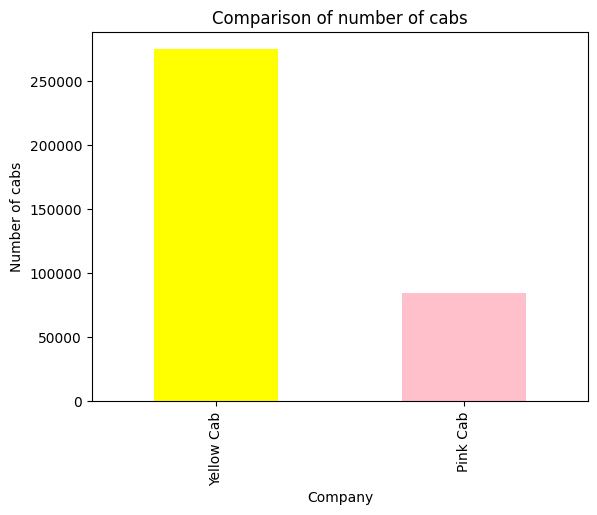

In [ ]:
fig = cab_data['Company'].value_counts().plot.bar(color=['yellow', 'pink'])
fig.set_title('Comparison of number of cabs')
fig.set_ylabel('Number of cabs')

In [ ]:
Yellowcab = cab_data[cab_data['Company'] == 'Yellow Cab']
Pinkcab = cab_data[cab_data['Company'] == 'Pink Cab']

In [ ]:
len(cab_data)

359392

In [ ]:
# Percentage total per cab
cab_data['Company'].value_counts(normalize=True)

Company
Yellow Cab    0.764294
Pink Cab      0.235706
Name: proportion, dtype: float64

In [ ]:
# Average profit/Km yellow
mean_profit_yellow=Yellowcab['Profit']/Yellowcab['KM Travelled']
mean_profit_yellow.mean()

7.105507808353117

In [ ]:
# Average profit/Km pink
mean_profit_pink=Pinkcab['Profit']/Pinkcab['KM Travelled']
mean_profit_pink.mean()

2.769907700396534

Text(0, 0.5, 'Average Profit/Km')

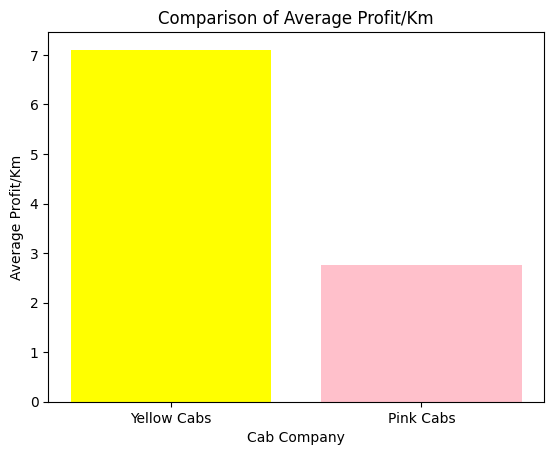

In [ ]:
categories = ['Yellow Cabs', 'Pink Cabs']
values = [mean_profit_yellow.mean(), mean_profit_pink.mean()]

# Plotting
plt.bar(categories, values, color=['yellow','pink'])

# Add title and labels
plt.title('Comparison of Average Profit/Km')
plt.xlabel('Cab Company')
plt.ylabel('Average Profit/Km')

#

In [ ]:
cab_data['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

Text(0.5, 0, 'City')

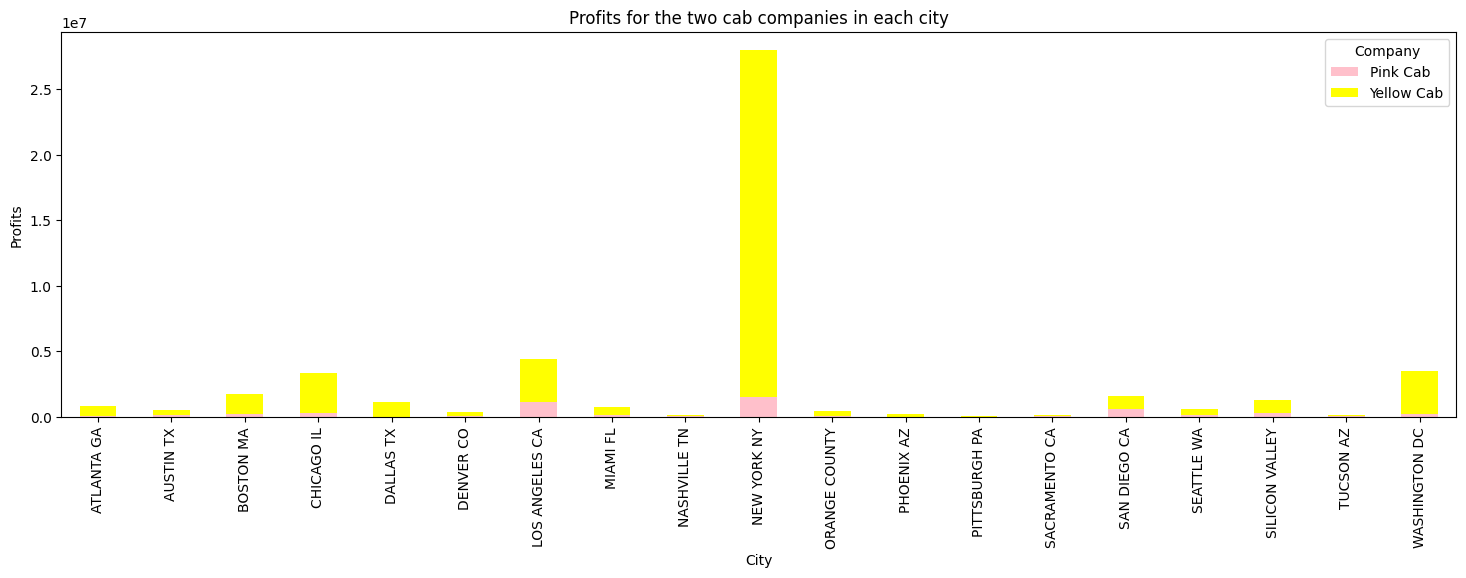

In [ ]:
sorted_data = cab_data.groupby(['City', 'Company']).sum()

fig = sorted_data.unstack().plot(kind='bar', y='Profit', stacked=True, figsize=(18, 5),color=['pink','yellow'])

fig.set_title('Profits for the two cab companies in each city')
fig.set_ylabel('Profits')
fig.set_xlabel('City')


It appears that the yellow cab company makes more profit in every city as compared to pink cab company.

In [ ]:

cab_data['year']=pd.to_datetime(cab_data['Date of Travel']).dt.year
cab_data.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Mean_Profit/Km,year
0,10000011,2016/01/08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,1.882266,2016
1,10000012,2016/01/06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,0.826904,2016
2,10000013,2016/01/02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,3.049558,2016
3,10000014,2016/01/07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,0.777751,2016
4,10000015,2016/01/03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,1.929439,2016


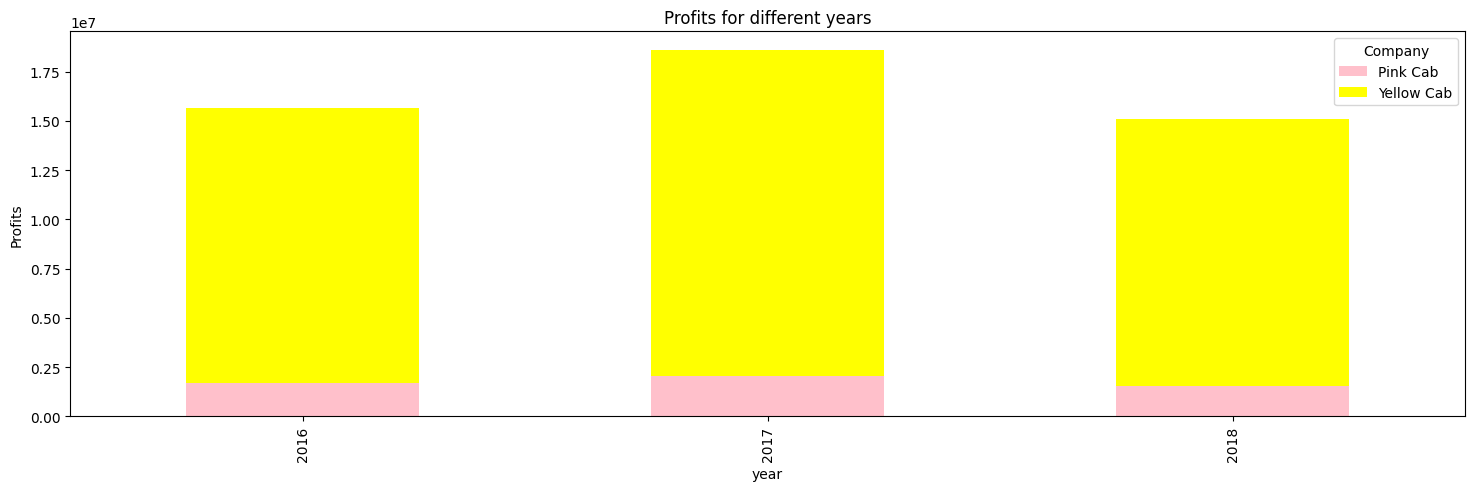

In [ ]:
fig=cab_data.groupby(['year','Company']).sum().unstack().plot(kind='bar',y='Profit', stacked=True,figsize=(18,5), color=['pink','yellow'])
fig.set_title('Profits for different years')
fig.set_ylabel('Profits')
result=cab_data.groupby(['year','Company']).sum()



Yearly profit analysis

Text(0, 0.5, 'Profits')

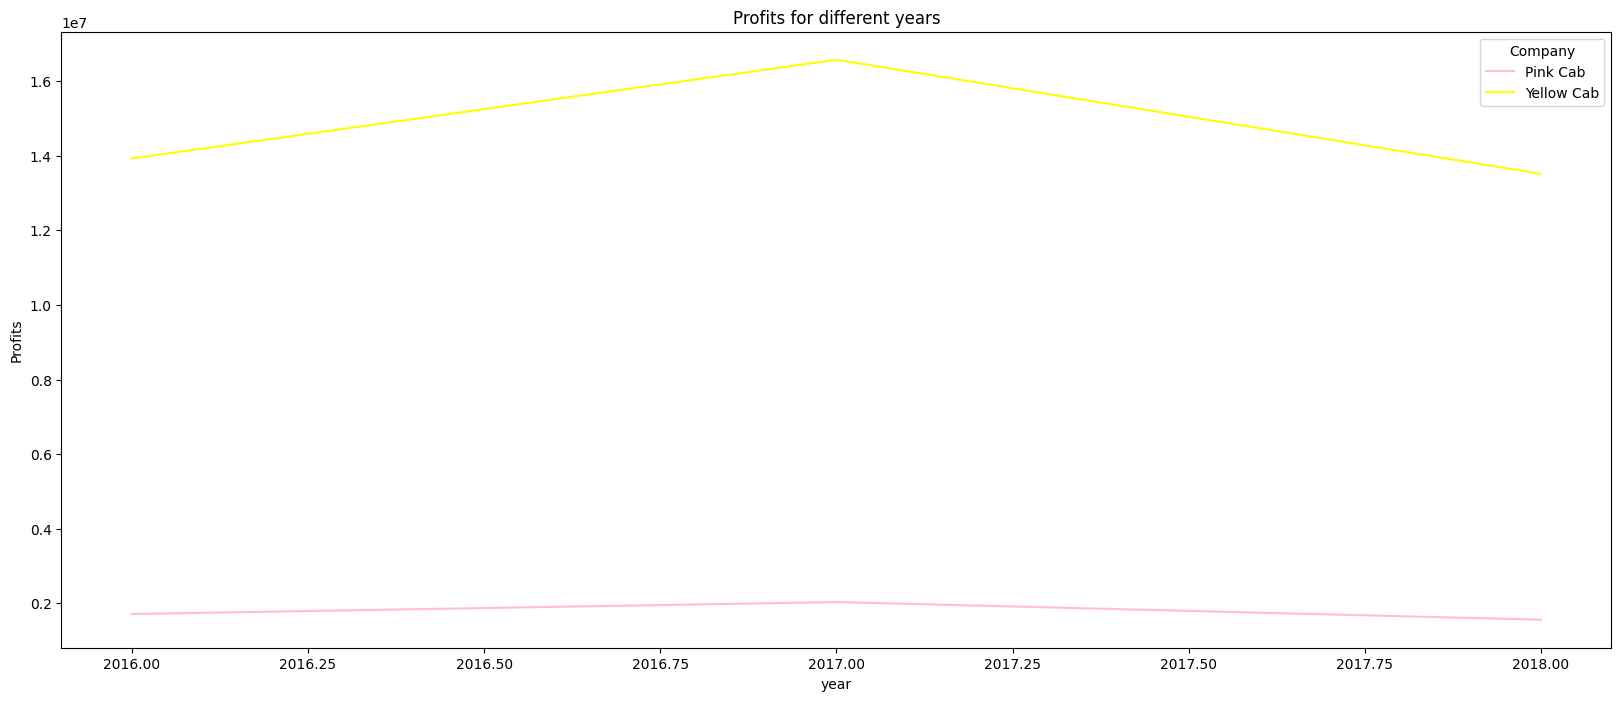

In [ ]:
fig=cab_data.groupby(['year','Company']).sum().unstack().plot(kind='line',y='Profit', stacked=False,figsize=(20,8), color=['pink','yellow'])
fig.set_title('Profits for different years')
fig.set_ylabel('Profits')

It appears that the yellow cab company makes significantly more profit than the pink cab company and achieves growth in profit from the year 2016 to 2017 whereas pink cab appears to make a constant profit yearly which could indicate lack of company growth.

Yearly Profit Analysis

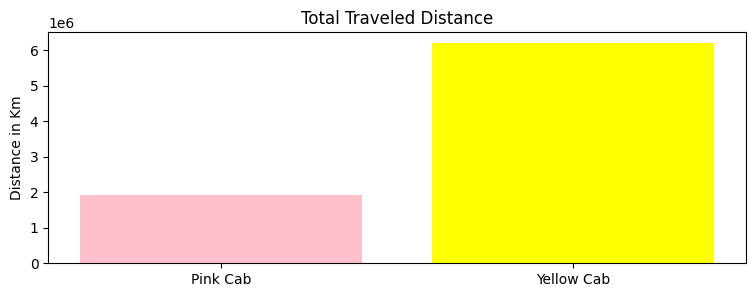

            KM Travelled
Company                 
Pink Cab      1911073.11
Yellow Cab    6199417.47


In [ ]:
#Total distance traveled by cabs
Travel = cab_data[["Company", "KM Travelled"]]
Travel_df = (Travel.groupby("Company").sum()).sort_values(by="KM Travelled")

    #visualization
plt.figure(figsize = (9,3))
plt.bar(Travel_df.index,Travel_df["KM Travelled"], color=['pink','yellow'])
plt.ylabel("Distance in Km")
plt.title("Total Traveled Distance")
plt.show()

print(Travel_df)

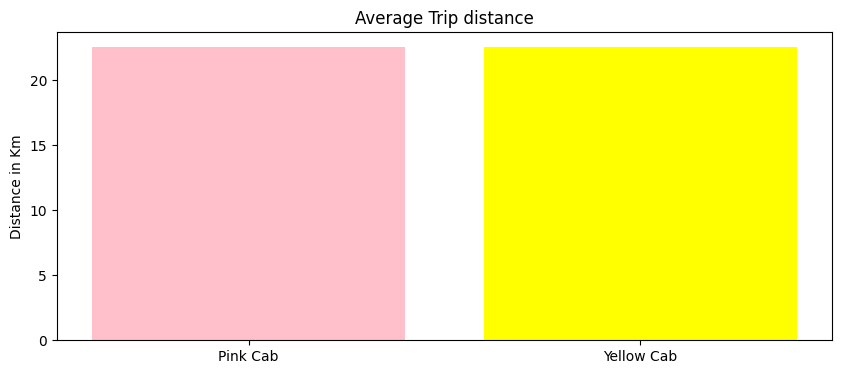

            KM Travelled
Company                 
Pink Cab       22.559917
Yellow Cab     22.569517


In [ ]:
#Average Trip distance
dist = cab_data[["Company", "KM Travelled"]]
dist_df = (dist.groupby("Company").mean()).sort_values(by="KM Travelled")

    #visualization
plt.figure(figsize = (10,4))
plt.bar(dist_df.index,dist_df["KM Travelled"],color=['pink','yellow'])
plt.ylabel("Distance in Km")
plt.title("Average Trip distance")
plt.show()

print(dist_df)


In [ ]:
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


Gender
Male      26562
Female    22609
Name: count, dtype: int64


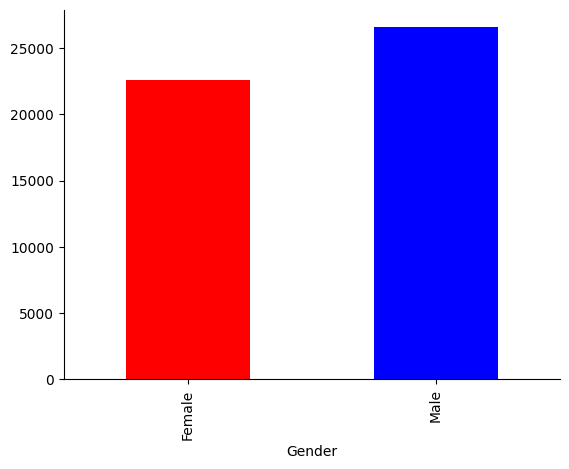

In [ ]:
# @title Gender

from matplotlib import pyplot as plt
import seaborn as sns
customer_id.groupby('Gender').size().plot(kind='bar', color=['red','blue'])
plt.gca().spines[['right', 'top',]].set_visible(False)
gen_count=customer_id['Gender'].value_counts()
print(gen_count)

Text(0.5, 1.0, 'Customer Demography')

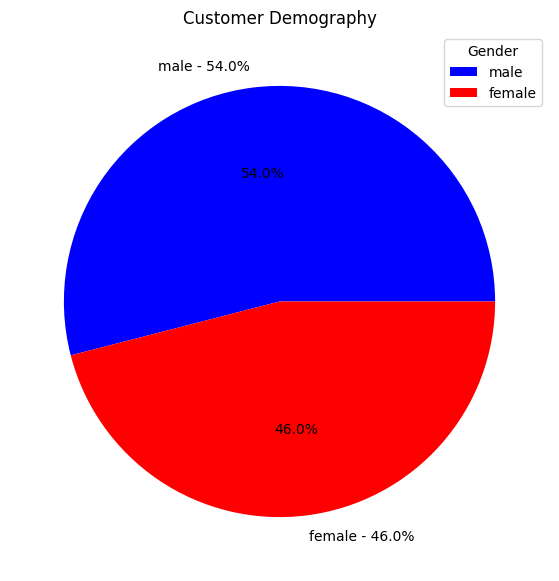

In [ ]:
labels = ['male', 'female']
colors = ['blue', 'red']
gen_count=customer_id['Gender'].value_counts()
# Calculate the percentage for each gender
total = sum(gen_count)
percentages = [f'{(count / total) * 100:.1f}%' for count in gen_count]

# Create the pie chart
fig = plt.figure(figsize=(10, 7))
plt.pie(gen_count, labels=[f'{label} - {percentage}' for label, percentage in zip(labels, percentages)], colors=colors, autopct='%1.1f%%')
#legend
plt.legend(labels, title="Gender", loc="best")
plt.title('Customer Demography')

Text(0, 0.5, 'Mean Income (USD/Month)')

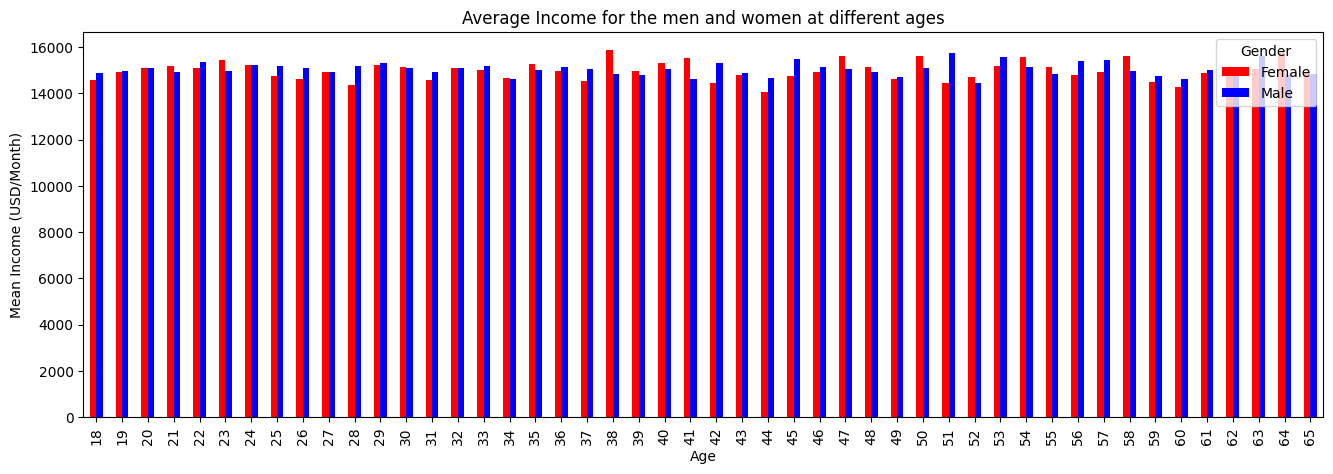

In [ ]:
fig=customer_id.groupby(['Age','Gender']).mean().unstack().plot(kind='bar',y='Income (USD/Month)', stacked=False,figsize=(16,5), color=['red','blue'])
fig.set_title('Average Income for the men and women at different ages')
fig.set_ylabel('Mean Income (USD/Month)')

In [ ]:
df = pd.merge(cab_data, transaction, on="Transaction ID")
df_1=pd.merge(customer_id, df, on="Customer ID")
df_1.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Mean_Profit/Km,Payment_Mode
0,29290,Male,28,10813,10000011,2016/01/08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1.882266,Card
1,27703,Male,27,9237,10000012,2016/01/06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,0.826904,Card
2,28712,Male,53,11242,10000013,2016/01/02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,3.049558,Cash
3,28712,Male,53,11242,10079404,2016/09/21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,210.0920,5.305354,Card
4,28712,Male,53,11242,10186994,2017/06/23,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,118.9736,6.540605,Card


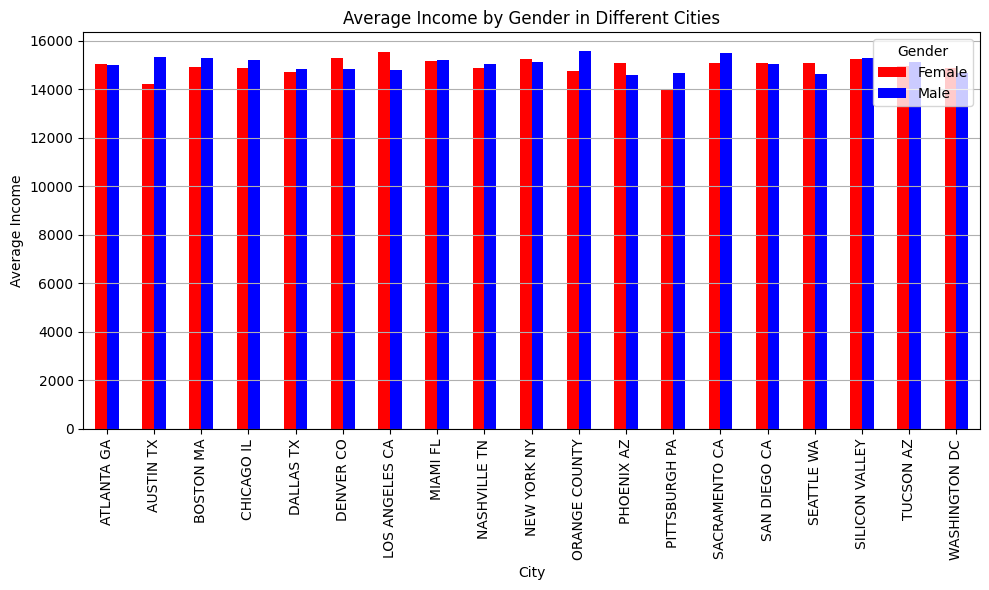

Gender                Female          Male
City                                      
ATLANTA GA      15034.704274  15010.598414
AUSTIN TX       14206.162033  15318.881992
BOSTON MA       14920.282521  15306.461430
CHICAGO IL      14873.455426  15211.295661
DALLAS TX       14728.366704  14853.783784
DENVER CO       15304.396718  14851.158548
LOS ANGELES CA  15547.498920  14808.912438
MIAMI FL        15180.920716  15203.978567
NASHVILLE TN    14873.612821  15040.770905
NEW YORK NY     15240.033540  15147.880850
ORANGE COUNTY   14774.226744  15577.166820
PHOENIX AZ      15097.177586  14596.958855
PITTSBURGH PA   13994.340909  14671.127424
SACRAMENTO CA   15086.542320  15487.521538
SAN DIEGO CA    15096.819349  15048.350114
SEATTLE WA      15072.447733  14637.523290
SILICON VALLEY  15247.846566  15278.970551
TUCSON AZ       14960.624742  15146.415929
WASHINGTON DC   14865.990110  14672.107965


In [ ]:
df_1.dropna(inplace=True)

# Calculate average income for males and females in each city
average_income = df_1.groupby(['City', 'Gender'])['Income (USD/Month)'].mean().unstack()

# Plotting
average_income.plot(kind='bar', figsize=(10, 6), color=['red','blue'])
plt.title('Average Income by Gender in Different Cities')
plt.xlabel('City')
plt.ylabel('Average Income')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
print(average_income)

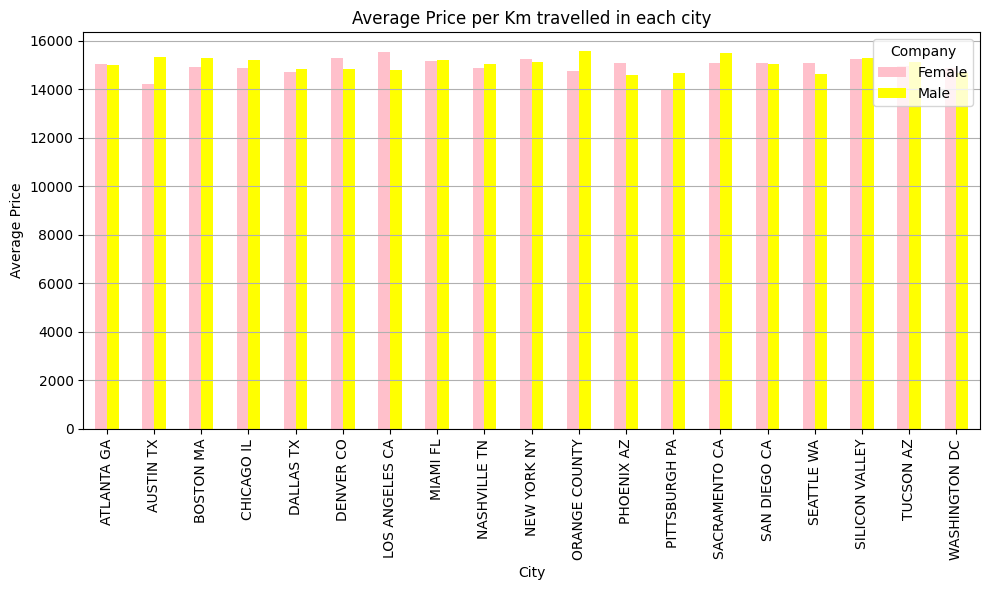

Company          Pink Cab  Yellow Cab
City                                 
ATLANTA GA      13.691938   19.538617
AUSTIN TX       14.749392   19.601649
BOSTON MA       13.300435   16.376390
CHICAGO IL      12.757518   16.594222
DALLAS TX       11.818213   22.749863
DENVER CO       12.118860   20.399222
LOS ANGELES CA  13.784998   18.863421
MIAMI FL        14.691940   20.065445
NASHVILLE TN    12.357073   16.706946
NEW YORK NY     15.600362   27.839094
ORANGE COUNTY   14.228884   20.504111
PHOENIX AZ      13.130967   19.711765
PITTSBURGH PA   12.219872   18.412230
SACRAMENTO CA   13.238666   16.162187
SAN DIEGO CA    13.743717   17.813851
SEATTLE WA      12.900202   17.821110
SILICON VALLEY  15.088293   22.726161
TUCSON AZ       14.352503   16.667981
WASHINGTON DC   13.317121   17.277314


In [ ]:
df_1.dropna(inplace=True)

# Calculate average income for males and females in each city
df_1['Price/Km']=df_1['Price Charged']/df_1['KM Travelled']
average_price = df_1.groupby(['City', 'Company'])['Price/Km'].mean().unstack()

# Plotting
average_price.plot(kind='bar', figsize=(10, 6), color=['pink','yellow'])
plt.title('Average Price per Km travelled in each city')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.legend(title='Company')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
print(average_price)

Text(0, 0.5, 'Profits')

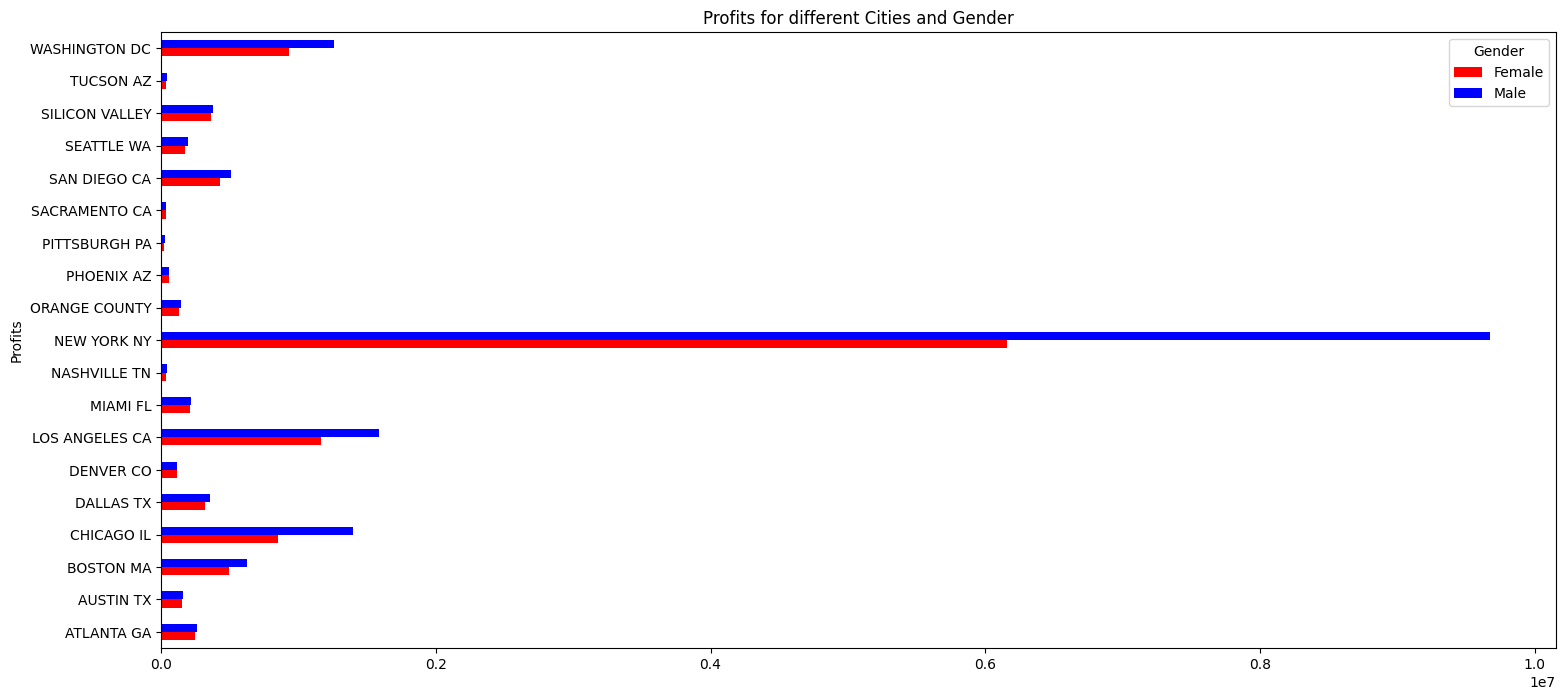

In [ ]:
fig=df_1.groupby(['City','Gender']).sum().unstack().plot(kind='barh',y='Profit', stacked=False,figsize=(18,8), color=['red','blue'])
fig.set_title('Profits for different Cities and Gender')
fig.set_ylabel('Profits')

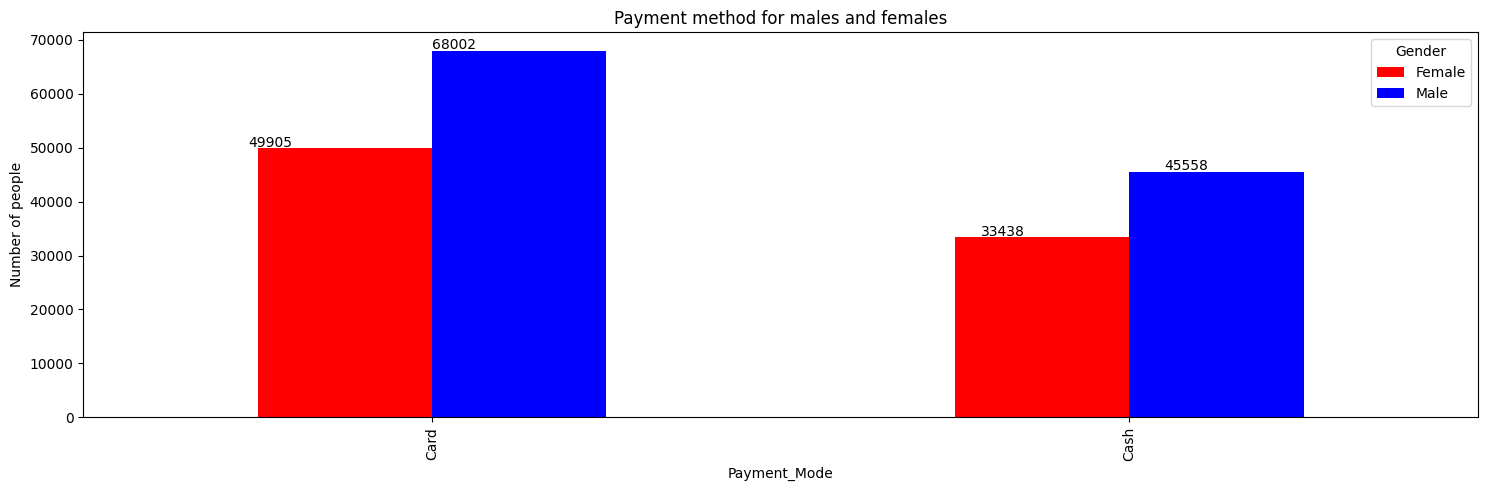

In [ ]:
fig=df_1.groupby(['Payment_Mode','Gender']).size().unstack().plot(kind='bar', stacked=False,figsize=(18,5),color=['red','blue'])
fig.set_title('Payment method for males and females')
fig.set_ylabel('Number of people')
df_1.groupby(['Payment_Mode','Gender']).size()
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.005))

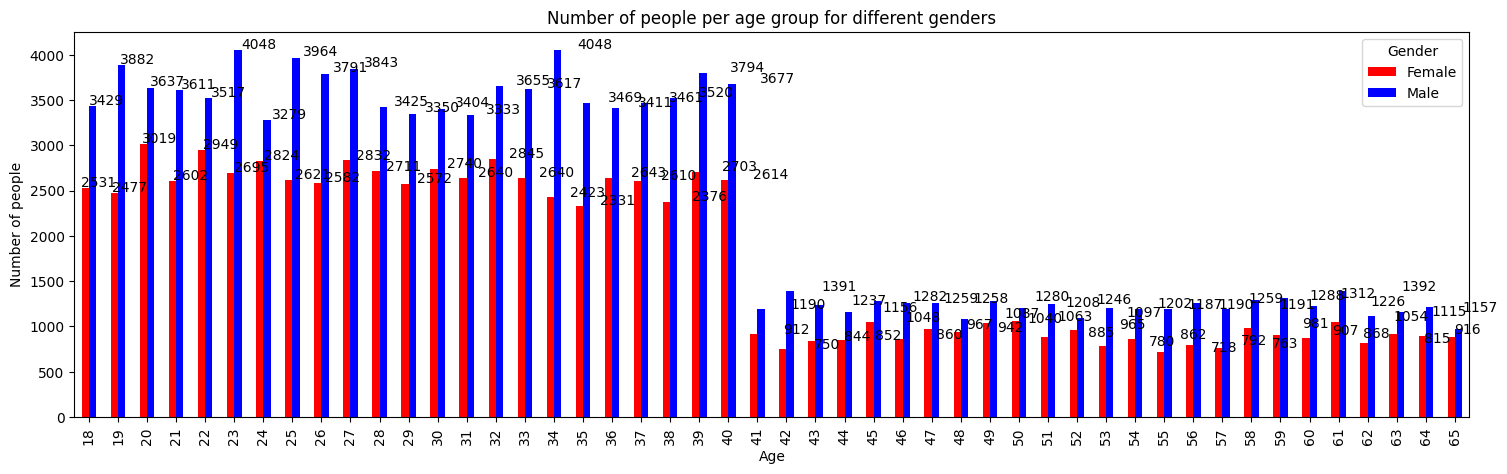

In [ ]:
fig=df_1.groupby(['Age','Gender']).size().unstack().plot(kind='bar', stacked=False,figsize=(18,5),color=['red','blue'])
fig.set_title('Number of people per age group for different genders')
fig.set_ylabel('Number of people')

for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.005))

Text(0, 0.5, 'Profit')

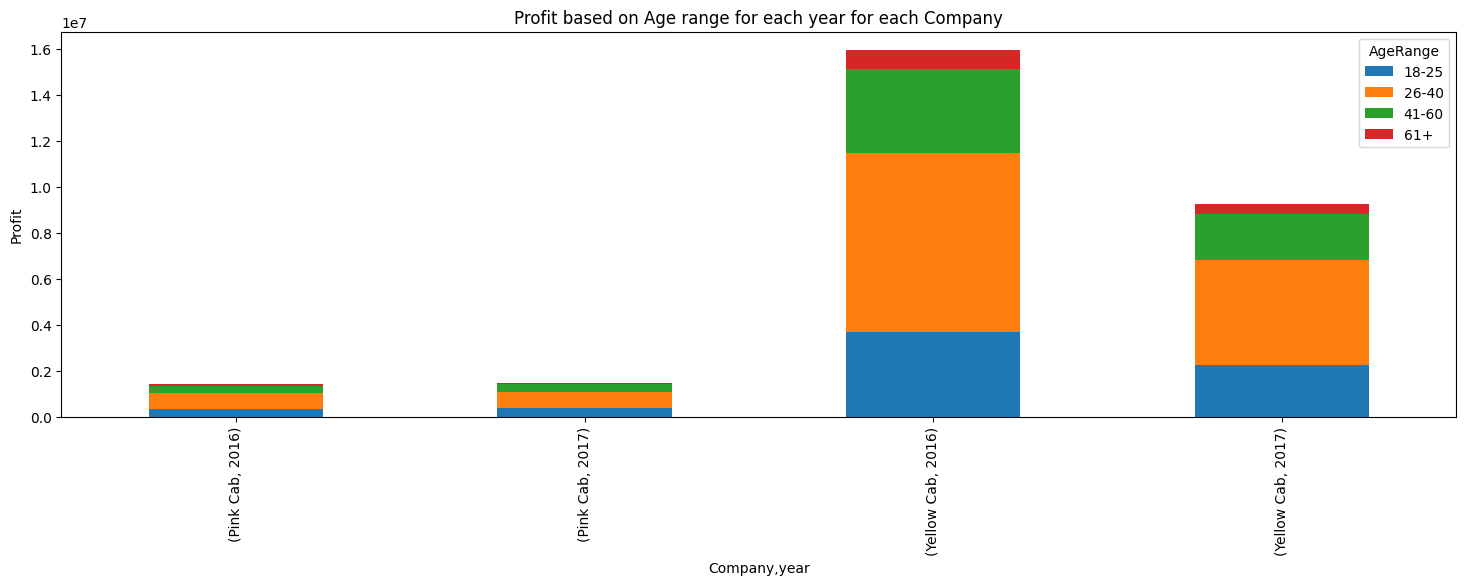

In [ ]:
bins = [18,25,40,60, np.inf]
names = ['18-25','26-40','41-60', '61+']
df_1['year']=pd.to_datetime(cab_data['Date of Travel']).dt.year
df_1['AgeRange'] = pd.cut(df_1['Age'], bins, labels=names)

fig=df_1.groupby(['Company','year','AgeRange']).sum().unstack().plot(kind='bar',y='Profit', stacked=True,figsize=(18,5),align='center')
fig.set_title('Profit based on Age range for each year for each Company')
fig.set_ylabel('Profit')



In [ ]:
#Master data
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196903 entries, 0 to 196902
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Customer ID         196903 non-null  int64   
 1   Gender              196903 non-null  object  
 2   Age                 196903 non-null  int64   
 3   Income (USD/Month)  196903 non-null  int64   
 4   Transaction ID      196903 non-null  int64   
 5   Date of Travel      196903 non-null  object  
 6   Company             196903 non-null  object  
 7   City                196903 non-null  object  
 8   KM Travelled        196903 non-null  float64 
 9   Price Charged       196903 non-null  float64 
 10  Cost of Trip        196903 non-null  float64 
 11  Profit              196903 non-null  float64 
 12  Mean_Profit/Km      196903 non-null  float64 
 13  Payment_Mode        196903 non-null  object  
 14  Price/Km            196903 non-null  float64 
 15  AgeRange            19

[link text](https://)df_1 is the Master data
Features     <- 17
Observations <- 196,903

Assumptions made
1. Profit per ride is calculated using cost per trip and price charged, however other contributing factors have not been accounted for.
2. We assume that users column in city data includes users of other cabs besides yellow and pink cabs
3. the price chargesd column in cab data contains outlier values however due to lack of information such as trip duration we cannot determine if the price charged is in fact an outlier therefore we treat these values as non outliers.

Recommendations
based on my analysis, l have concluded that the yellow cab company is a better investment as compared to the pink cab company due o the following factors
1. It appears that the yellow cab has more customers compared to pink cabs, this may be due to the fact that the ratio of yellow to pink cabs is 3,24:1 respectively, therefore yellow cabs have more customer reach due to the abundance.
2. Average profit/Km, the yellow cab company makes a profit of $7,11/ Km  compared to the $2,77/Km make by the pink company which is a mere 38.95% of the profit/Km made by yellow cab.
3. Average price/Km ,yellow cab charges more money per Km travelled in every city compred to the pink cab company
4. Both the cabs are very popular in high and medium income class but here also Yellow cab is performing better than Pink cab in offering their services to all the three income class group low, medium and high
5. The yellow cab company has customers in all age group and appears to be very popular in the 18 to 40 age group.

Based on these reason l would advise XYZ to invest in the yellow cab company.